In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

(0.0, 0.07)

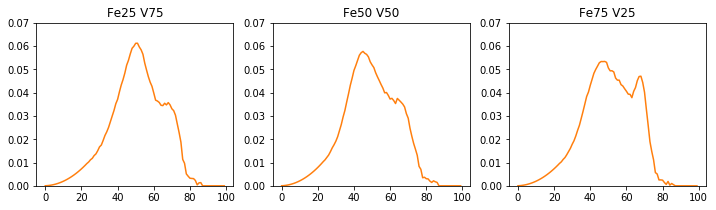

In [6]:
#Data sets for FeV alloys

d1 = pd.read_csv('Fe25V75_measured_DOS.csv')
d2 = pd.read_csv('Fe50V50_measured_DOS.csv')
d3 = pd.read_csv('Fe75V25_measured_DOS.csv')

fig1, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

#FIRST GRAPH
axes[0].plot(d1)
axes[0].set_title('Fe25 V75')
axes[0].set_ylim([0.0,0.07])

#SECOND GRAPH
axes[1].plot(d2)
axes[1].set_title('Fe50 V50')
axes[1].set_ylim([0.0,0.07])

#THIRD GRAPH 
axes[2].plot(d3)
axes[2].set_title('Fe75 V25')
axes[2].set_ylim([0.0,0.07])

(0.0, 0.07)

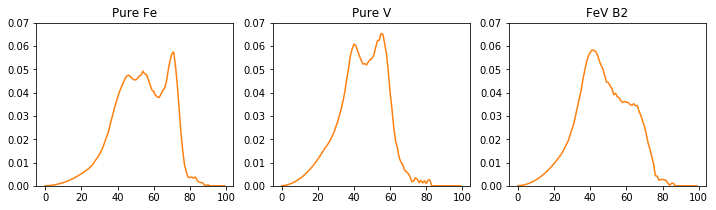

In [7]:
#Data sets for pure Fe and V elements

d4 = pd.read_csv('Fe_measured_DOS.csv')
d5 = pd.read_csv('V_measured_DOS.csv')
d6 = pd.read_csv('FeV_B2_measured_DOS.csv')

fig2, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,3))

#Fe Graph
axes[0].plot(d4)
axes[0].set_title('Pure Fe')
axes[0].set_ylim([0.0,0.07])

#V Graph
axes[1].plot(d5)
axes[1].set_title('Pure V')
axes[1].set_ylim([0.0,0.07])

#FeV Graph B2
axes[2].plot(d6)
axes[2].set_title('FeV B2')
axes[2].set_ylim([0.0,0.07])


In [53]:
# Normalize energy by cutoff energy
# Put all the data in pd series

Fe_ser = pd.Series(d4['0.1'].values, index=d4['0'].values / 40)
Fe75V25_ser = pd.Series(d3['0.1'].values, index=d3['0'].values / 40)
Fe50V50_A2_ser = pd.Series(d2['0.1'].values, index=d2['0'].values / 40)
Fe50V50_B2 = pd.Series(d6['0.1'].values, index=d6['0'].values / 40)
Fe25V75_ser = pd.Series(d1['0.1'].values, index=d1['0'].values / 40)
V_ser = pd.Series(d5['0.1'].values, index=d5['0'].values / 36)

In [101]:
# Ugly but does the job
# Puts the Vanadium (which was divided by 36) on the same energy scale as the other 5 samples (divided by 40)
# First create the list of interpolated values

interpolatedDOS = []
for i in Fe_ser.index:
    energyList = []
    intensityList = []
    for j in V_ser.index:
        if np.absolute(j - i) <  V_ser.index[0]:
            energyList.append(j)
            intensityList.append(V_ser.get(j))

    interpolatedDOS.append(np.interp(i, energyList, intensityList))

In [102]:
# Then update the Vanadium pandas series

V_ser = pd.Series(interpolatedDOS, index=Fe_ser.index)

In [103]:
# Put all the series in a pandas DataFrame with a shared energy index

aDict = {}
aDict['Fe'] = Fe_ser
aDict['Fe75V25'] = Fe75V25_ser
aDict['Fe50V50_A2'] = Fe50V50_A2_ser
aDict['Fe50V50_B2'] = Fe50V50_B2
aDict['Fe25V75'] = Fe25V75_ser
aDict['V'] = V_ser 

df = pd.DataFrame(aDict)

In [104]:
# Everything is there

df

,Fe,Fe75V25,Fe50V50_A2,Fe50V50_B2,Fe25V75,V
0.0125,0.000011,0.000016,0.000017,0.000021,0.000016,0.000025
0.0250,0.000046,0.000064,0.000069,0.000083,0.000064,0.000084
0.0375,0.000103,0.000145,0.000154,0.000187,0.000144,0.000186
0.0500,0.000183,0.000257,0.000275,0.000333,0.000256,0.000328
0.0625,0.000286,0.000403,0.000430,0.000521,0.000400,0.000510
0.0750,0.000412,0.000581,0.000621,0.000752,0.000577,0.000732
0.0875,0.000562,0.000792,0.000846,0.001026,0.000786,0.000996
0.1000,0.000736,0.001036,0.001108,0.001343,0.001029,0.001300
0.1125,0.000933,0.001313,0.001405,0.001704,0.001304,0.001645
0.1250,0.001154,0.001624,0.001739,0.002109,0.001613,0.002031


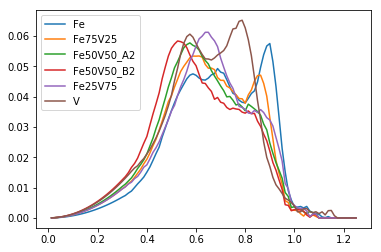

In [108]:
df.plot()

In [122]:
# You used a matrix to solve the system of equations with values similar to these (at rescaled energy 0.9)
df[['Fe', 'Fe50V50_A2', 'Fe50V50_B2','V']].loc[0.9000]

Fe            0.057485
Fe50V50_A2    0.024688
Fe50V50_B2    0.022052
V             0.016973
Name: 0.9, dtype: float64

In [124]:
# Use the same matrices to get the values V0 V1 V2,1 V2,2
# But at every energy, for example at rescaled energy 0.7000
df[['Fe', 'Fe50V50_A2', 'Fe50V50_B2','V']].loc[0.7000]

Fe            0.048056
Fe50V50_A2    0.043478
Fe50V50_B2    0.038134
V             0.054375
Name: 0.7, dtype: float64


![alt text](bcc_correlation_functions.png)

In [126]:
df.Fe.iloc[40] = V0 + V1 + V21 + V22
df.Fe50V50_A2.iloc[40] = V0
df.Fe50V50_B2.iloc[40] = V0 - V21 + V22
df.V.iloc[40] = V0 - V1 + V21 + V22

0.037965642

In [149]:
correlationM = np.matrix([[1,1,1,1],[1,0,0,-1],[1,0,-1,+1],[1,0,1,1]])

In [150]:
correlationM

matrix([[ 1,  1,  1,  1],
        [ 1,  0,  0, -1],
        [ 1,  0, -1,  1],
        [ 1,  0,  1,  1]])

In [160]:
V0List = []
V1List = []
V21List = []
V22List = []
for energy in df.index:
    sol = np.matrix([[df.Fe.loc[energy], df.Fe50V50_A2.loc[energy], df.Fe50V50_B2.loc[energy], df.V.loc[energy]]])
    x = np.linalg.solve(correlationM, sol.T)
    V0List.append(x[0,0])
    V1List.append(x[1,0])
    V21List.append(x[2,0])
    V22List.append(x[3,0])
    

In [166]:
# Put all the series in a pandas DataFrame with a shared energy index

aDict = {}
aDict['V0'] = pd.Series(V0List, index=df.index)
aDict['V1'] = pd.Series(V1List, index=df.index)
aDict['V21'] = pd.Series(V21List, index=df.index)
aDict['V22'] = pd.Series(V22List, index=df.index)

dfV = pd.DataFrame(aDict)

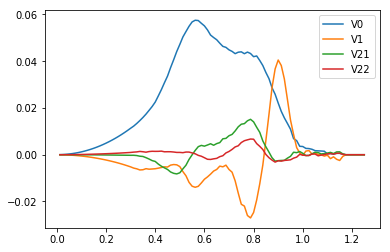

In [167]:
dfV.plot()


Plot above looks like the figure in the thesis, the only difference is that the areas are not normalized

![alt text](IPDOS.png)

In [ ]:
# Can you 'interpolate' the DOS of Fe25V75 and Fe75V25 disordered from the
# V0, V1, V21, V22's and compare to the measurements?